# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

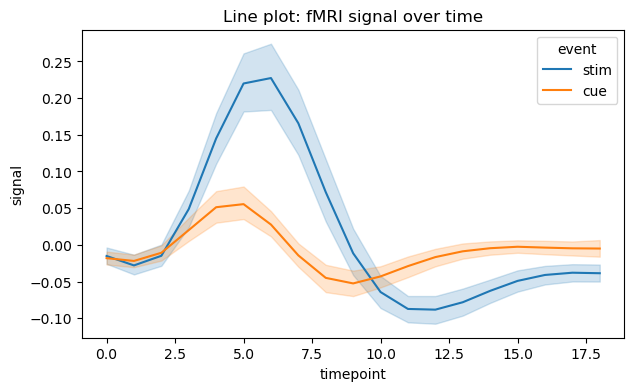

In [86]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



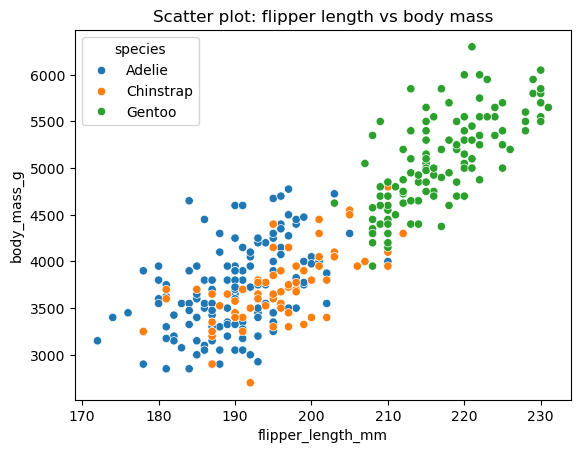

In [87]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



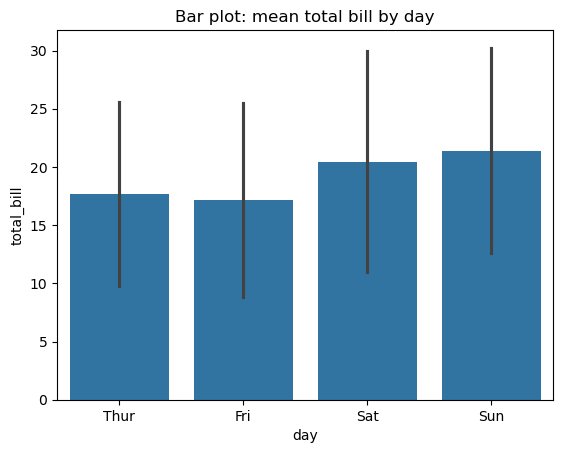

In [88]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

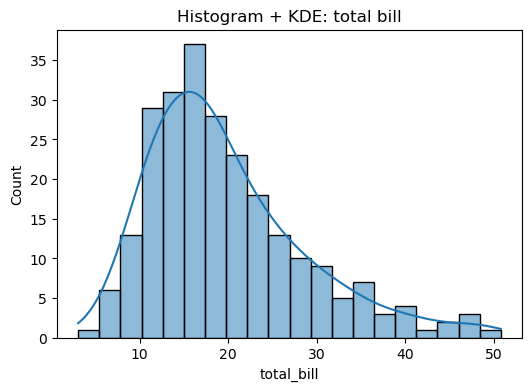

In [89]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

KDE stands for Kernel Density Estimation which is a method for estimating density of data; basically, it smooths out a histogram into a density curve. This is useful when you want to estimate the probability density function of a random variable, and it gives a curve-like representation of the distribution. 

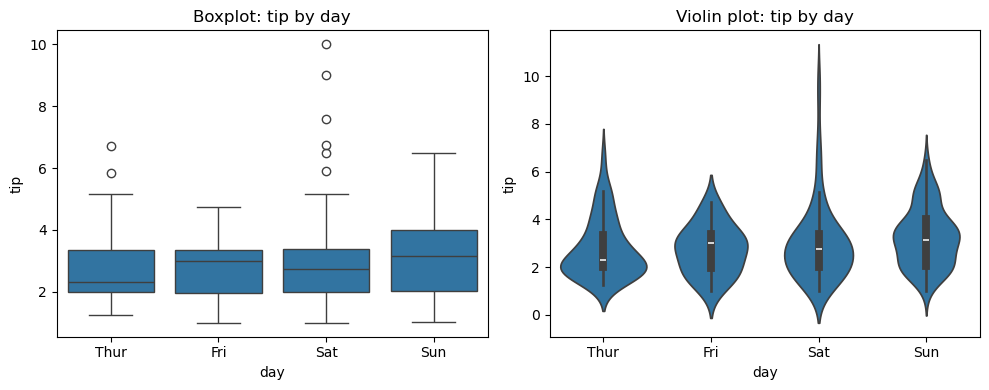

In [90]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

Boxplots are concise visualizations that summarize basic statistics like the median, range, and outliers. On the other hand, violin plots combine both the boxplot and density plot which give more information about density and the full shape of the distribution.

### 3. Multi-dimensional encodings – color, size & facets

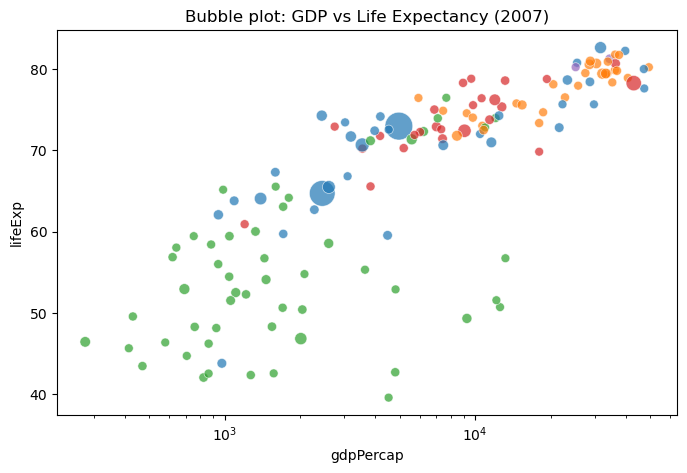

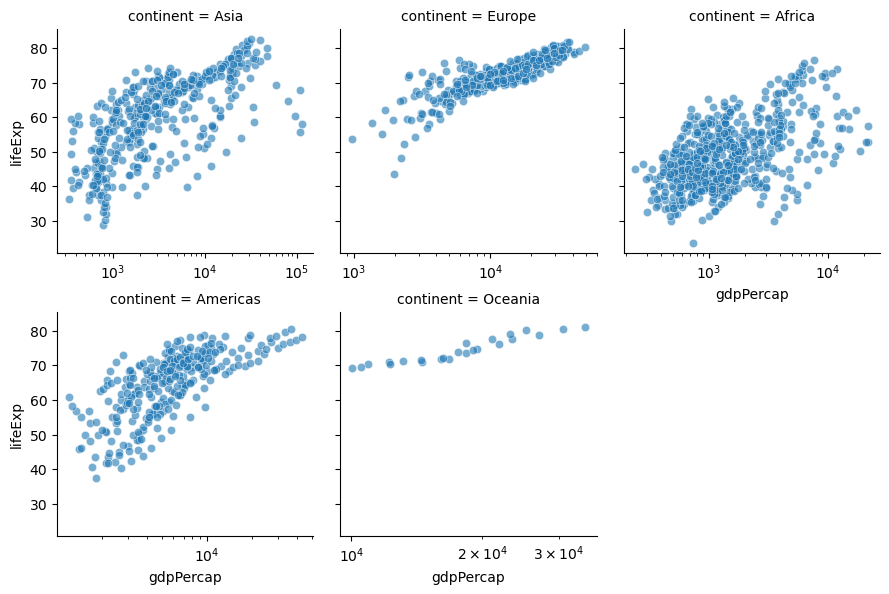

In [91]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

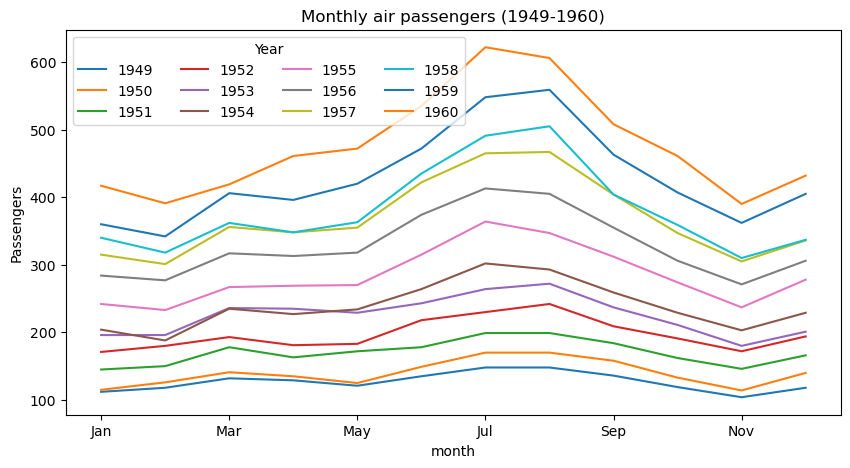

In [92]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

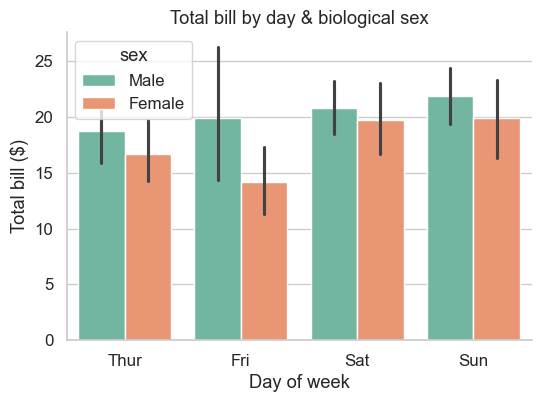

In [93]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [94]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (3, 49)


,Ea_4,Ea_6,So_9,We_7,No_6,We_5,No_12,We_6,We_1,So_5,...,No_1,No_9,Ea_5,We_2,So_10,No_8,So_8,No_10,Ea_7,We_8
0,3183,3431,3289,3998,2708,3673,3170,3864,3389,2954,...,2106,2895,3181,3354,3331,2810,3212,2947,3469,3919
1,3241,3406,3356,3870,2579,3699,3089,3802,3308,2974,...,2113,2839,3268,3429,3335,2752,3225,3057,3515,4043
2,3152,3428,3213,3883,2630,3677,3211,3705,3454,2974,...,2090,2924,3280,3362,3322,2823,3284,3061,3522,4053


#### Your analysis below

Product    Gizmo
Region     We_12
Revenue     4332
Name: 12, dtype: object


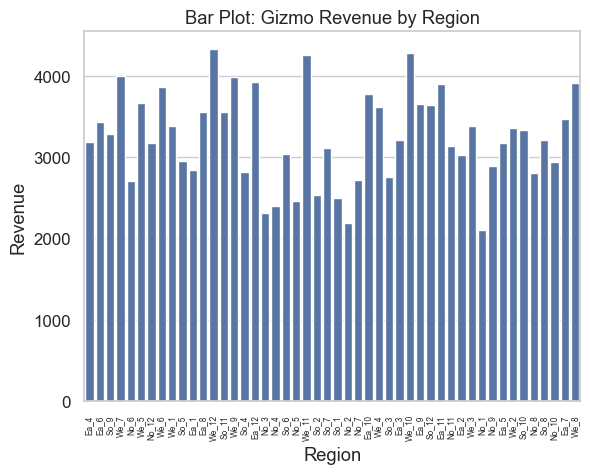

In [95]:
#KEY QUESTION 1

#Gizmo Dataframe
df_gizmo = df[df["Product"] == "Gizmo"]
df_gizmo_melted = df_gizmo.melt(id_vars = "Product", var_name = "Region", value_name = "Revenue")

#Plot bar plot for gizmo only
sns.barplot(data = df_gizmo_melted, x = "Region", y = "Revenue")
plt.title("Bar Plot: Gizmo Revenue by Region")
plt.xticks(rotation = 90, fontsize = 6)
plt.show

#Print max value
gizmo_max = df_gizmo_melted.loc[df_gizmo_melted["Revenue"].idxmax()]
print(gizmo_max)

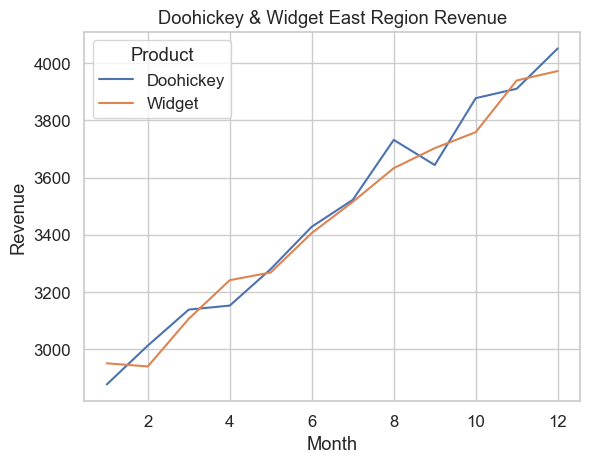

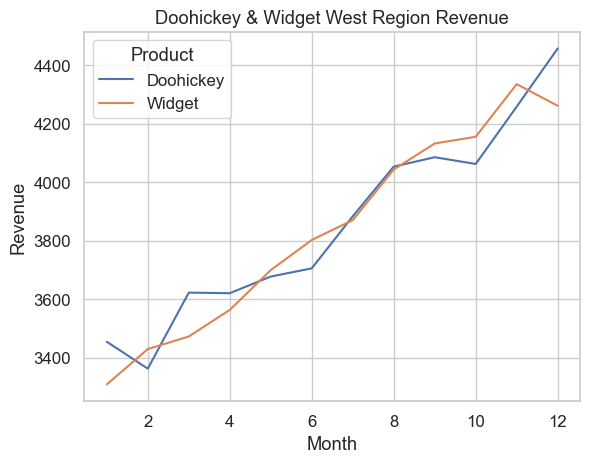

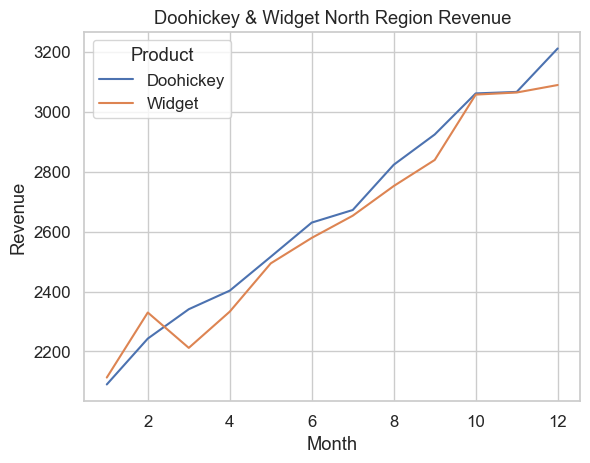

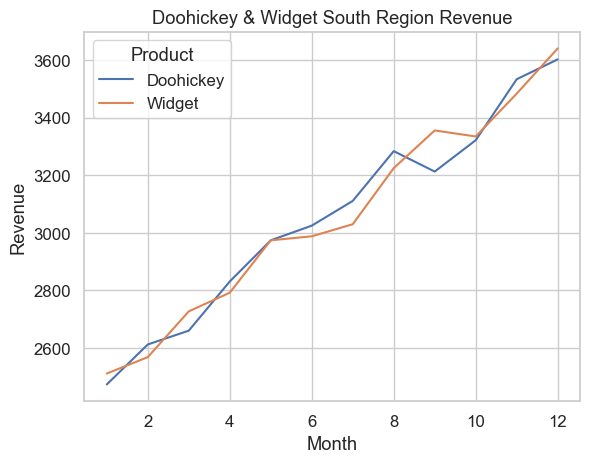

In [96]:
# #KEY QUESTION 2

#Extract each product
df_doohickey = df[df["Product"] == "Doohickey"]
df_widget = df[df["Product"] == "Widget"]

#Sort the east col rows by month
east_cols = sorted([col for col in df.columns if col.startswith("Ea_")], key=lambda x: int(x.split("_")[1])) + ["Product"]

doohickey_east = df_doohickey[east_cols]
widget_east = df_widget[east_cols]

#Melt df
doohickey_east_melt = doohickey_east.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")
widget_east_melt = widget_east.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")


#Instead of XX_# its just number now
doohickey_east_melt["Month"] = doohickey_east_melt["Month"].apply(lambda x: int(x.split("_")[1]))
widget_east_melt["Month"] = widget_east_melt["Month"].apply(lambda x: int(x.split("_")[1]))

#Combine two df
east_plot = pd.concat([doohickey_east_melt, widget_east_melt])

sns.lineplot(data = east_plot, x = "Month", y = "Revenue", hue = "Product", markers = "o")
plt.title("Doohickey & Widget East Region Revenue")
plt.show()

#####################################################################################################################################

west_cols = sorted([col for col in df.columns if col.startswith("We_")], key=lambda x: int(x.split("_")[1])) + ["Product"]

doohickey_west = df_doohickey[west_cols]
widget_west = df_widget[west_cols]

#Melt df
doohickey_west_melt = doohickey_west.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")
widget_west_melt = widget_west.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")


#Instead of XX_# its just number now
doohickey_west_melt["Month"] = doohickey_west_melt["Month"].apply(lambda x: int(x.split("_")[1]))
widget_west_melt["Month"] = widget_west_melt["Month"].apply(lambda x: int(x.split("_")[1]))

#Combine two df
west_plot = pd.concat([doohickey_west_melt, widget_west_melt])

sns.lineplot(data = west_plot, x = "Month", y = "Revenue", hue = "Product", markers = "o")
plt.title("Doohickey & Widget West Region Revenue")
plt.show()

#####################################################################################################################################

north_cols = sorted([col for col in df.columns if col.startswith("No_")], key=lambda x: int(x.split("_")[1])) + ["Product"]

doohickey_north = df_doohickey[north_cols]
widget_north = df_widget[north_cols]

#Melt df
doohickey_north_melt = doohickey_north.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")
widget_north_melt = widget_north.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")


#Instead of XX_# its just number now
doohickey_north_melt["Month"] = doohickey_north_melt["Month"].apply(lambda x: int(x.split("_")[1]))
widget_north_melt["Month"] = widget_north_melt["Month"].apply(lambda x: int(x.split("_")[1]))

#Combine two df
north_plot = pd.concat([doohickey_north_melt, widget_north_melt])

sns.lineplot(data = north_plot, x = "Month", y = "Revenue", hue = "Product", markers = "o")
plt.title("Doohickey & Widget North Region Revenue")
plt.show()

#####################################################################################################################################

south_cols = sorted([col for col in df.columns if col.startswith("So_")], key=lambda x: int(x.split("_")[1])) + ["Product"]

doohickey_south = df_doohickey[south_cols]
widget_south = df_widget[south_cols]

#Melt df
doohickey_south_melt = doohickey_south.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")
widget_south_melt = widget_south.melt(id_vars = "Product", var_name = "Month", value_name = "Revenue")


#Instead of XX_# its just number now
doohickey_south_melt["Month"] = doohickey_south_melt["Month"].apply(lambda x: int(x.split("_")[1]))
widget_south_melt["Month"] = widget_south_melt["Month"].apply(lambda x: int(x.split("_")[1]))

#Combine two df
south_plot = pd.concat([doohickey_south_melt, widget_south_melt])

sns.lineplot(data = south_plot, x = "Month", y = "Revenue", hue = "Product", markers = "o")
plt.title("Doohickey & Widget South Region Revenue")
plt.show()



### REPORT 1:

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [97]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (48, 6)


/var/folders/mx/cv_f44qs0m57p0lzjb0p91kh0000gn/T/ipykernel_34810/3125190993.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2025-01-01', periods=48, freq='H')


,timestamp,S1,S2,S3,S4,S5
0,2025-01-01 00:00:00,23.4|43,23.2|60,16.1|36,22.0|62,19.8|54
1,2025-01-01 01:00:00,21.7|64,21.9|53,19.8|63,21.2|46,16.8|33
2,2025-01-01 02:00:00,15.3|64,18.5|31,19.6|44,21.1|31,18.8|67
3,2025-01-01 03:00:00,16.3|34,14.1|39,18.4|55,17.8|40,19.6|39
4,2025-01-01 04:00:00,18.3|30,18.8|35,20.9|70,20.2|46,21.3|50


#### Your analysis below

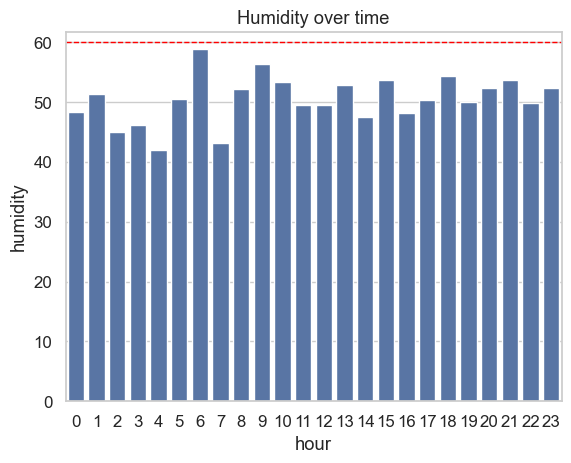

In [98]:
#KEY QUESTION 1
df_melted = df.melt(id_vars = "timestamp", var_name = "sensor", value_name = "temp|hum")
df_melted["humidity"] = df_melted["temp|hum"].str.split("|").str[1].astype(float)
df_melted["timestamp"] = pd.to_datetime(df_melted["timestamp"])
df_melted["hour"] = df_melted["timestamp"].dt.hour

df_melted.head()

sns.barplot(data = df_melted, x = "hour", y = "humidity", errorbar = None)
plt.axhline(y = 60, color = "red", linestyle = "--", linewidth = 1)
plt.title("Humidity over time")
plt.show()



<Axes: xlabel='temperature', ylabel='humidity'>

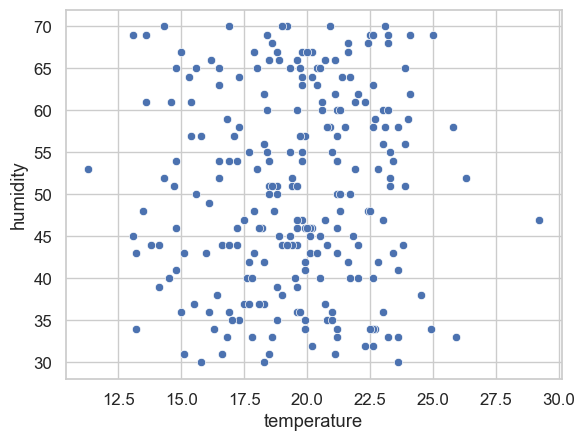

In [99]:
#KEY QUESTION 2
df_melted["temperature"] = df_melted["temp|hum"].str.split("|").str[0].astype(float)

sns.scatterplot(data = df_melted, x= "temperature", y = "humidity")


### REPORT 2:

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [100]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,respondent_id,age_group,tools_used,satisfaction_1-5
0,1,35-44,"MATLAB, JavaScript",2
1,2,18-24,"JavaScript, MATLAB, Python",5
2,3,35-44,Python,2
3,4,18-24,MATLAB,1
4,5,45+,"R, Python",3


#### Your analysis below

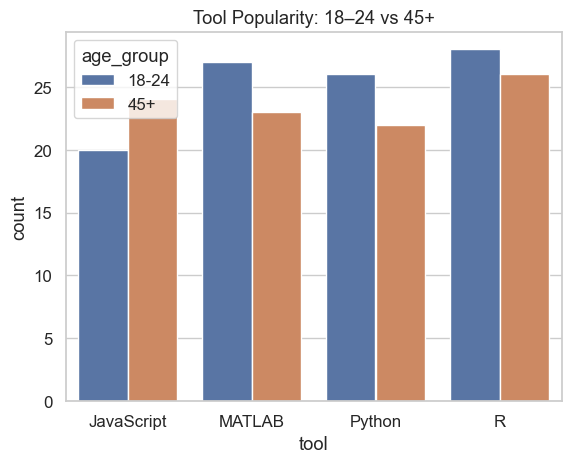

In [104]:
#KEY QUESTION 1
# Filter for relevant age groups
df_subset = df[df['age_group'].isin(['18-24', '45+'])].copy()

# Split tools_used into individual tools
df_tools = df_subset.assign(tool=df_subset['tools_used'].str.split(', ')).explode('tool')

# Count tool frequency per age group
tool_counts = df_tools.groupby(['age_group', 'tool']).size().reset_index(name='count')

# Plot
sns.barplot(data=tool_counts, x='tool', y='count', hue='age_group')
plt.title("Tool Popularity: 18–24 vs 45+")
plt.show()

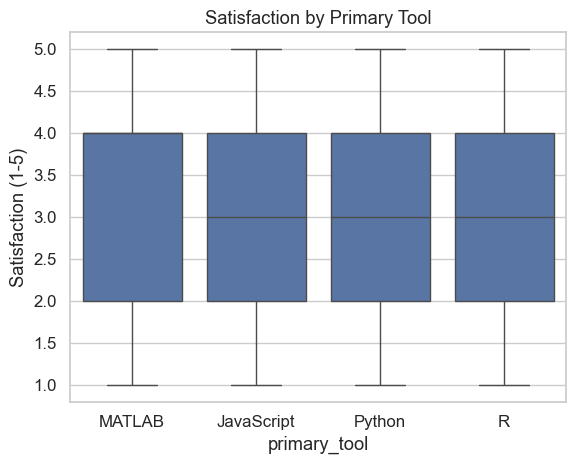

primary_tool
R             3.177778
MATLAB        3.148936
JavaScript    3.020408
Python        2.864407
Name: satisfaction_1-5, dtype: float64

In [105]:
#KEY QUESTION 2
# Extract primary tool (first in the list)
df['primary_tool'] = df['tools_used'].str.split(', ').str[0]

# Boxplot to show satisfaction distribution by primary tool
sns.boxplot(data=df, x='primary_tool', y='satisfaction_1-5')
plt.title("Satisfaction by Primary Tool")
plt.ylabel("Satisfaction (1-5)")
plt.show()

# Optional: Compare mean satisfaction
df.groupby('primary_tool')['satisfaction_1-5'].mean().sort_values(ascending=False)


### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [109]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (50, 7)


,subject,bp_pre_placebo,bp_post_placebo,bp_pre_drugA,bp_post_drugA,bp_pre_drugB,bp_post_drugB
0,Subj_001,119.548867,114.094175,120.826110,111.032536,130.013310,119.772162
1,Subj_002,120.791217,112.562718,111.784655,103.887436,125.972125,122.467071
2,Subj_003,128.505307,121.488112,120.189221,109.695923,111.847243,109.447937
3,Subj_004,111.608758,105.553563,119.179658,107.963673,138.012140,134.619841
4,Subj_005,109.882259,106.330117,110.428419,102.107684,122.152405,118.700995


#### Your analysis below

Average BP Reduction (post - pre):
placebo   -4.965708
drugA     -9.773534
drugB     -5.220332
dtype: float64


### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [30]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (752, 4)


,date,platform,views,likes
0,2024-07-01,TikTok,98.0k,11853.0
1,2024-07-01,Instagram,17.1k,923.0
2,2024-07-01,YouTube,71.3k,3668.0
3,2024-07-02,TikTok,71.2k,8457.0
4,2024-07-02,Instagram,48.3k,5724.0


#### Your analysis below

In [110]:
df_melted = df.melt(id_vars = "platform")
df_melted.head()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['platform']"